## Zomato Restaurant project by Francis Afuwah
Batch DS2312

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# load the Zomato dataset with 'ISO-8859-1' encoding
zomato_data = pd.read_csv('zomato.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset and its info
zomato_data_head = zomato_data.head()
zomato_data_info = zomato_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
zomato_data_info

In [4]:
zomato_data_head

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
# Load the Country-Code.xlsx file
country_codes = pd.read_excel('Country-Code.xlsx')

# Display the first few rows and the columns of the country codes data
country_codes_head = country_codes.head()
country_codes_info = country_codes.info()

(country_codes_head, country_codes_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


(   Country Code    Country
 0             1      India
 1            14  Australia
 2            30     Brazil
 3            37     Canada
 4            94  Indonesia,
 None)

In [6]:
# Merge the country codedata into the Zomato dataset
zomato_full = zomato_data.merge(country_codes, on='Country Code', how='left')

# Display the first few rows of the merged dataset and check for missing values
zomato_full_head = zomato_full.head()
zomato_full_missing = zomato_full.isnull().sum()

(zomato_full_head, zomato_full_missing)

(   Restaurant ID         Restaurant Name  Country Code              City  \
 0        6317637        Le Petit Souffle           162       Makati City   
 1        6304287        Izakaya Kikufuji           162       Makati City   
 2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
 3        6318506                    Ooma           162  Mandaluyong City   
 4        6314302             Sambo Kojin           162  Mandaluyong City   
 
                                              Address  \
 0  Third Floor, Century City Mall, Kalayaan Avenu...   
 1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
 2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
 3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
 4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
 
                                      Locality  \
 0   Century City Mall, Poblacion, Makati City   
 1  Little Tokyo, Legaspi Village, Makati City   
 2  Edsa Shangri-La, Ortigas, Mandaluyong 

In [7]:
# Fill missing values in 'Cuisines' with 'Unknown'
zomato_full['Cuisines'].fillna('Unknown', inplace=True)

# Check again for missing values to confirm the fill operation
missing_after_fill = zomato_full.isnull().sum()

# Prepare categorical data for modeling: encoding example with 'City' and 'Country'
# Convert categorical variables using one-hot encoding
zomato_encoded = pd.get_dummies(zomato_full, columns=['City', 'Country', 'Cuisines'], drop_first=True)

# Display the changes to the dataset
encoded_head = zomato_encoded.head()
encoded_columns = zomato_encoded.columns

(missing_after_fill, encoded_head, encoded_columns)


(Restaurant ID           0
 Restaurant Name         0
 Country Code            0
 City                    0
 Address                 0
 Locality                0
 Locality Verbose        0
 Longitude               0
 Latitude                0
 Cuisines                0
 Average Cost for two    0
 Currency                0
 Has Table booking       0
 Has Online delivery     0
 Is delivering now       0
 Switch to order menu    0
 Price range             0
 Aggregate rating        0
 Rating color            0
 Rating text             0
 Votes                   0
 Country                 0
 dtype: int64,
    Restaurant ID         Restaurant Name  Country Code  \
 0        6317637        Le Petit Souffle           162   
 1        6304287        Izakaya Kikufuji           162   
 2        6300002  Heat - Edsa Shangri-La           162   
 3        6318506                    Ooma           162   
 4        6314302             Sambo Kojin           162   
 
                                   

## Visualisations

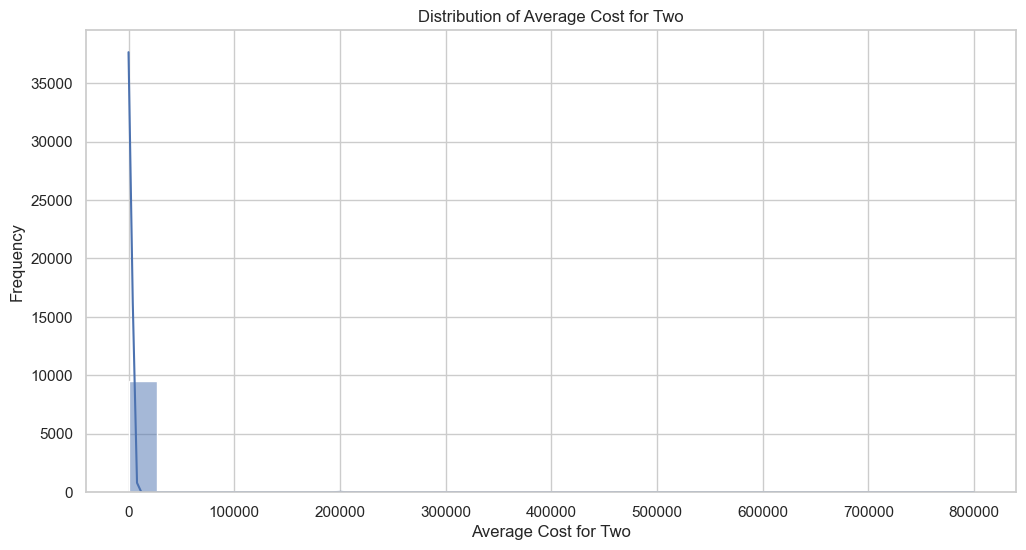

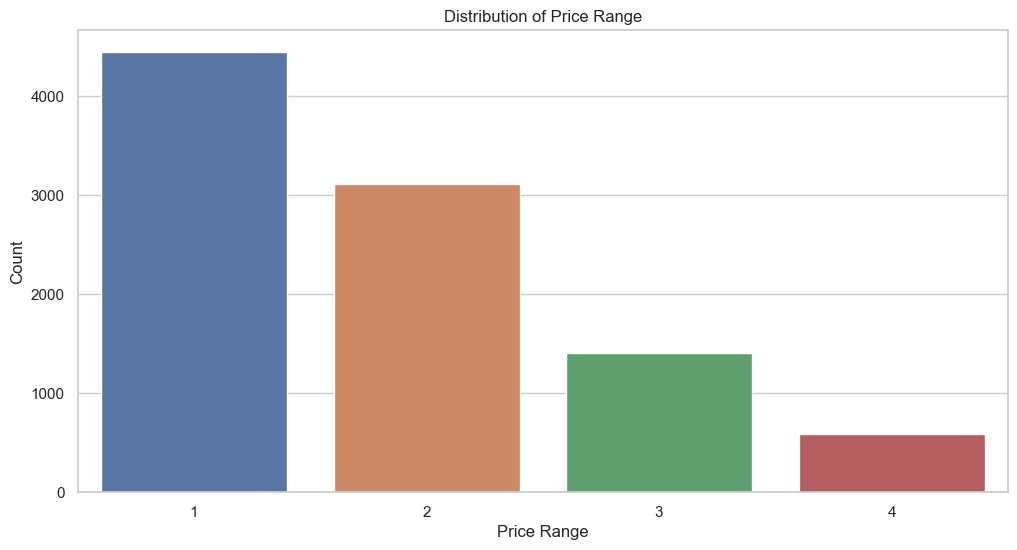

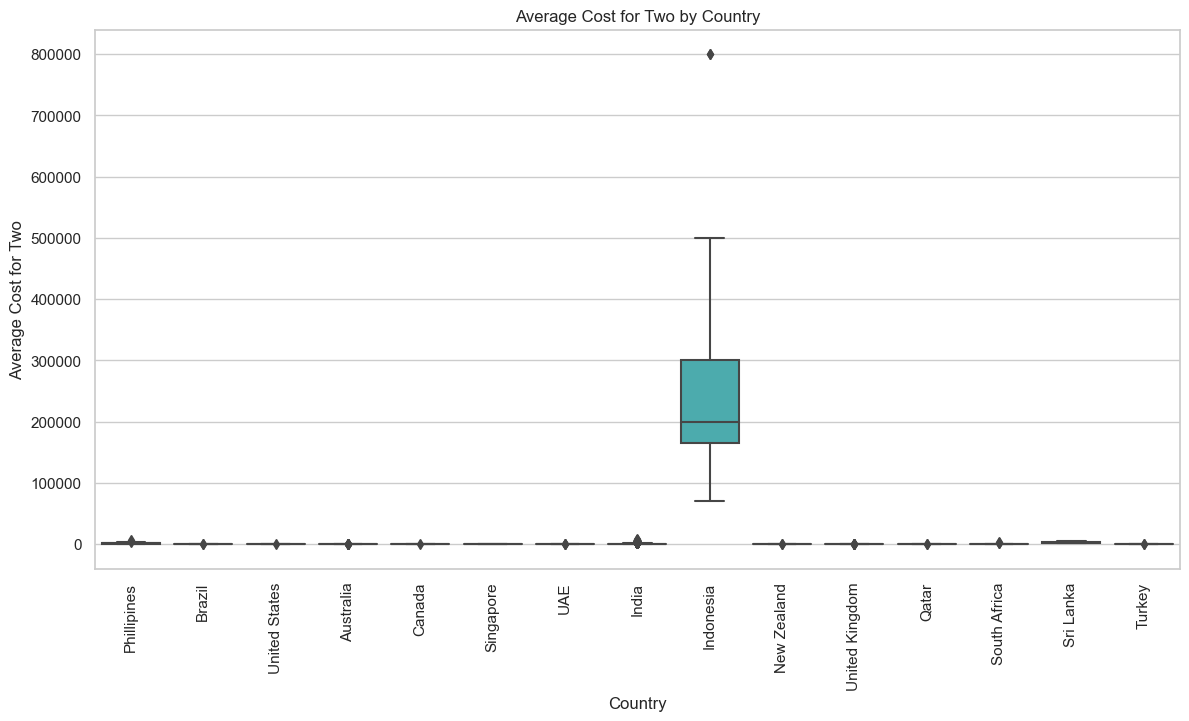

In [9]:
# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Plotting the distribution of 'Average Cost for two'
plt.figure(figsize=(12, 6))
sns.histplot(zomato_full['Average Cost for two'], bins=30, kde=True)
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'Price range'
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', data=zomato_full)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

# Boxplot to see how the 'Average Cost for two' varies across different countries
plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='Average Cost for two', data=zomato_full)
plt.title('Average Cost for Two by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.show()


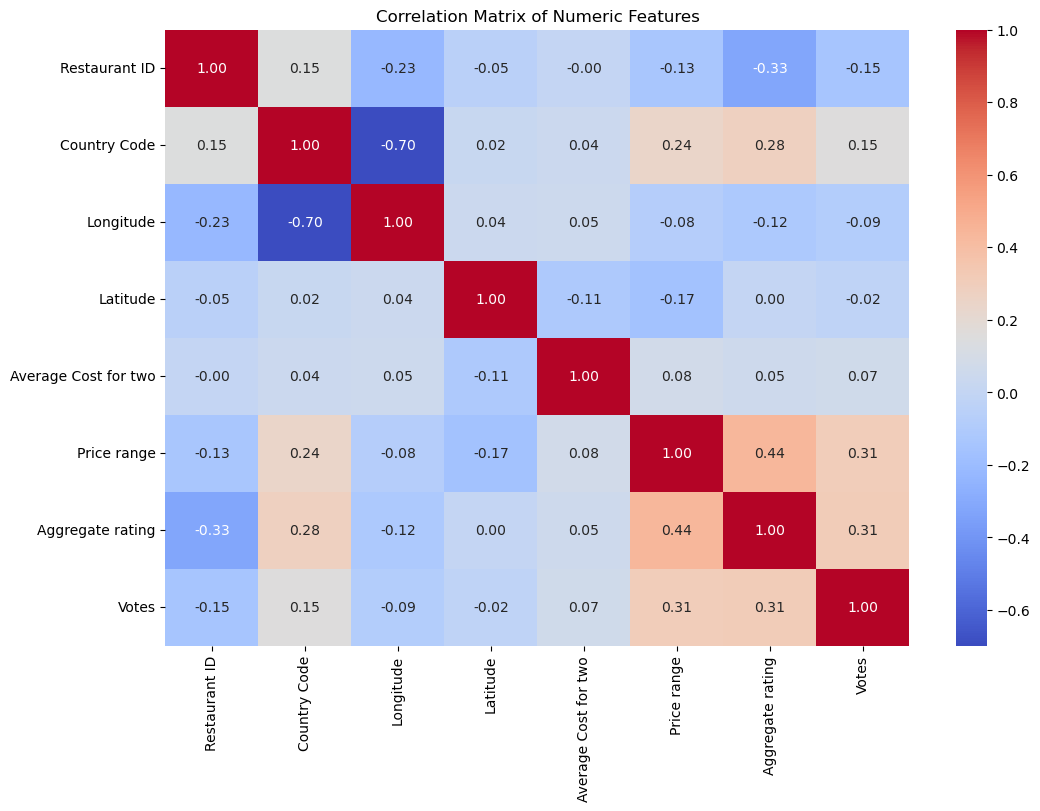

In [8]:
# Calculating the correlation matrix for numeric features including the target variables
numeric_features = zomato_full.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


The heatmap displays the correlation matrix for the numeric features in the dataset, including our target variables Average Cost for two and Price range. Here are some key insights:

1. Correlation with Average Cost for two:

This variable shows some level of positive correlation with Price range, which is expected as both relate to the cost of dining at the restaurant.
There's a very small correlation with Aggregate rating and Votes. This suggests that while higher-rated or more popular restaurants might have higher costs, the relationship is not very strong.

2. Correlation with Price range:

As noted, Price range is positively correlated with Average Cost for two.
Similar to Average Cost for two, Price range shows minimal correlation with Votes and Aggregate rating.

## Conclusions:
Feature Selection: The correlation results suggest that while there might not be strong linear relationships between our target variables and other numeric features like Votes or Aggregate rating, Price range and Average Cost for two are somewhat related. This means we could explore models that capture non-linear relationships or incorporate categorical data effectively.
Model Types: Given the nature of the relationships, regression models for Average Cost for two and possibly ordinal logistic regression or classification models for Price range could be suitable.